# Challenge #2 #

Challenge #2: SRR14149060 is from a breast cancer study
https://www.ncbi.nlm.nih.gov/sra/?term=SRR14149060 
1. Analyze read lengths: are these human reads? To what do they target?
2. Generate concept for a rapid mapping of reads to the human genome to assess quality and distribution

In [1]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Data expolration
# Checking access to a single record
records= list(SeqIO.parse('./seq_reads/SRR14149060.fasta', "fasta"))
print(type(records[0]))
print(records[0])

<class 'Bio.SeqRecord.SeqRecord'>
ID: SRR14149060.1
Name: SRR14149060.1
Description: SRR14149060.1 1 length=144
Number of features: 0
Seq('GCNTATGCACATTTTTAGAATTCCATTATCTTGAATACAAATAGGGAAATATCT...CAA')


In [4]:
# Descriptive analysis
lengths = [len(record.seq) for record in SeqIO.parse("./seq_reads/SRR14149060.fasta", "fasta")]
print(pd.Series(lengths).describe())

count    1.236596e+06
mean     1.437503e+02
std      4.360910e+00
min      3.100000e+01
25%      1.440000e+02
50%      1.440000e+02
75%      1.440000e+02
max      1.440000e+02
dtype: float64


In [8]:
pd.Series(lengths).head()

0    144
1    144
2    144
3    144
4    144
dtype: int64

We can see that the majority of reads have length of 144 bp

To understand what the sequences target, I would like to use BLASTn. In order to do that, I have created another .fasta file, which contains 1000 randomly picked records. Script for creating a subsample:
seqtk sample -s100 SRR14149060.fasta 1000 > sample_1k.fasta


I have uploaded newely created subsample sample_1k.fasta to NCBI BLASTn and have chosen mode "megablast" i order to find highly similar sequences.

Here is the BLASTn output. All real (not predicted) sequences with 100% query cover belong to Homo sapiens.

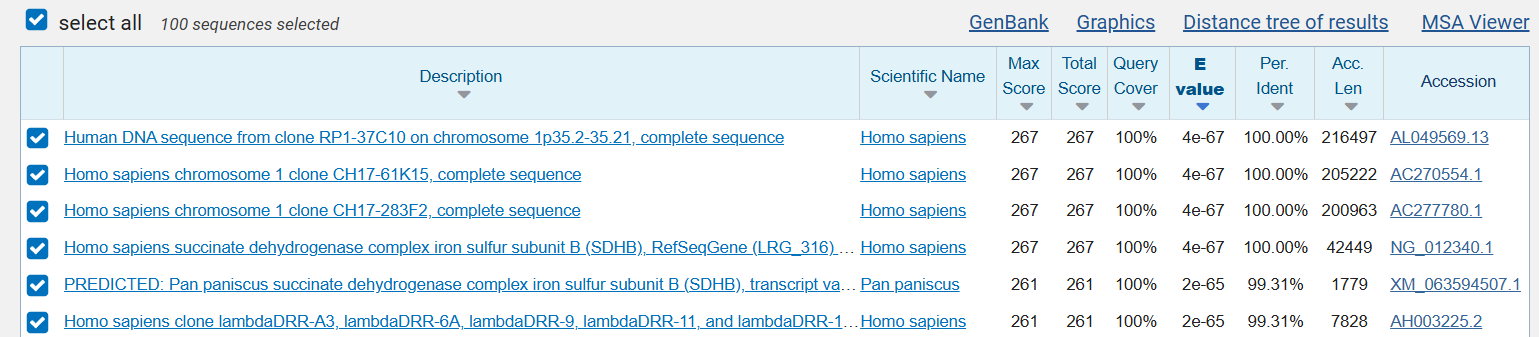

I have filtered out hits that belong to Homo sapiens. There are 13 distinct sequences in the subsample. The initial file SRR14149060.fasta probably contains more unique sequences, so I expect that running BLASTn on the original file would output 13 or more matches.

I noticed that at least 8 of 13 output sequences are related to Succinate Dehydrogenase Complex. Recent studies have revealed that its expression is increased in patients with breast cancer and that SDHA is involved in cell proliferation [1].

References:
1. https://cancerci.biomedcentral.com/articles/10.1186/s12935-025-03746-6


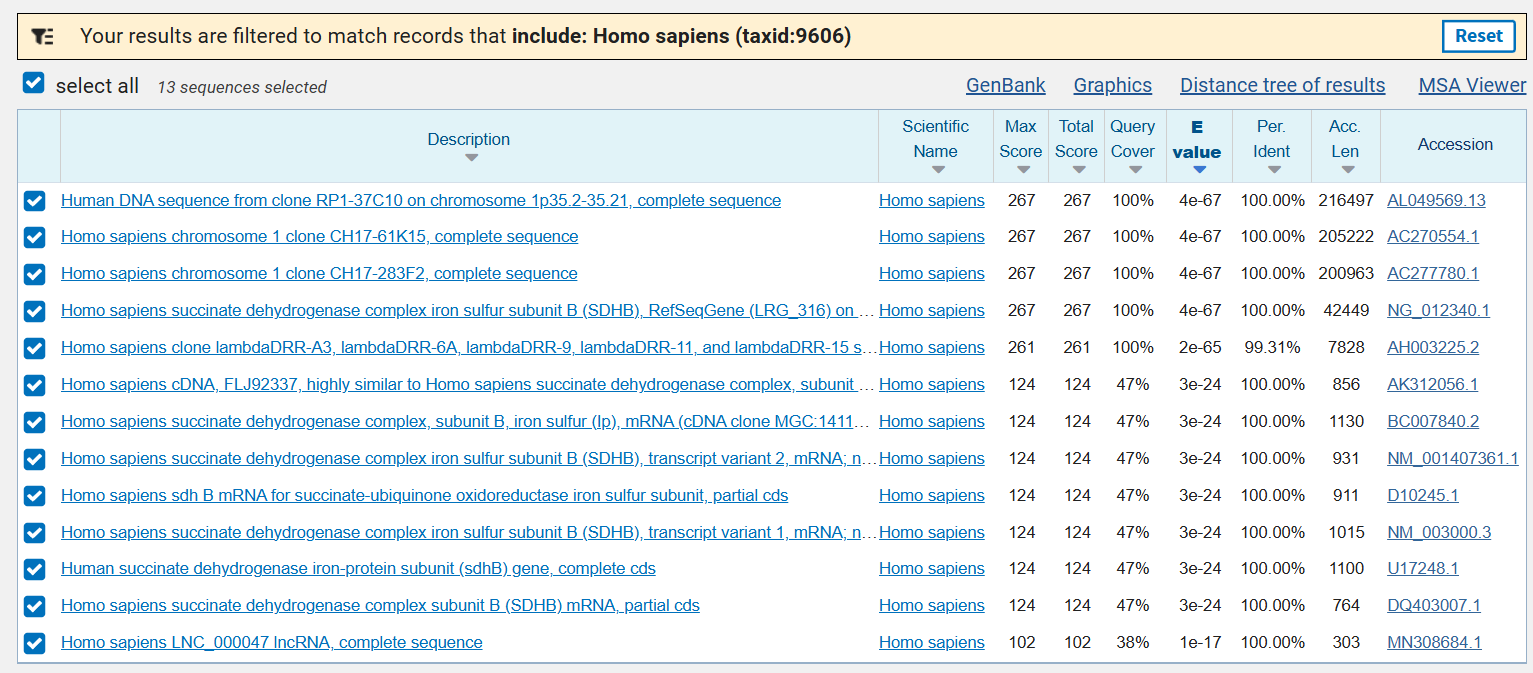